# 531 Final Project

There are two parts in my final project.  
The first part is getting the traffic sign from an image.  
The second part is using neuron network to classify traffic sign.

## Part 1:  getting the traffic sign from a picture

Here are the major steps:  
1. read the original mage.
2. change the original image to hsv channel
3. set parameters of the color
4. extract the color area from the image
5. optimizing process the color area
6. cut the color from the area 
7. save the color area 
The color area is the traffic sign

In [1]:
import cv2
import numpy as np

This is a list including some colors.  
Because common traffic signs are white, red, blue, green and yellow. So I add these colors into the list. 

In [2]:
color = list()
color.append('white')
color.append('red')
color.append('blue')
color.append('green')
color.append('yellow')

### HSV range 

In this part, I use hsv to set the color, because in an image, according to the light or camer, sometimes, the color of the traffic sign may has little change. So here I use hsv range to show the color, if the the color of the traffic sign is in the range, we can regard it as the color.  
For example, for red traffic signs, according to the light, some red signs maybe deeper color and some maybe lighter.  
Using hsv range considers the Hue, Saturation and Value.

These two lists, one is called lower and another one is called upper list. lower list is the min of the value of HSV in these color.  
upper list is the max of the value of HSV in these color. 

In [3]:
lower = list()
lower.append(np.array([0,0,221]))
lower.append(np.array([0,50,50]))
lower.append(np.array([100,50,50]))
lower.append(np.array([40,50,50]))
lower.append(np.array([100,50,50]))

In [4]:
upper = list()
upper.append(np.array([180,30,255]))
upper.append(np.array([10,255,255]))
upper.append(np.array([124,255,255]))
upper.append(np.array([77,255,255]))
upper.append(np.array([124,255,255]))

In [5]:
for i in range(len(color)):
    print(color[i])
    print('lower hsv')
    print(lower[i])
    print('upper hsv')
    print(upper[i])

white
lower hsv
[  0   0 221]
upper hsv
[180  30 255]
red
lower hsv
[ 0 50 50]
upper hsv
[ 10 255 255]
blue
lower hsv
[100  50  50]
upper hsv
[124 255 255]
green
lower hsv
[40 50 50]
upper hsv
[ 77 255 255]
yellow
lower hsv
[100  50  50]
upper hsv
[124 255 255]


### FindSign funcion

This is the the function that can find the sign in an image. The input is original image, color, lower and upper list. 
I will use white as an example to explain the function.

#### Read the original image   
6.jpg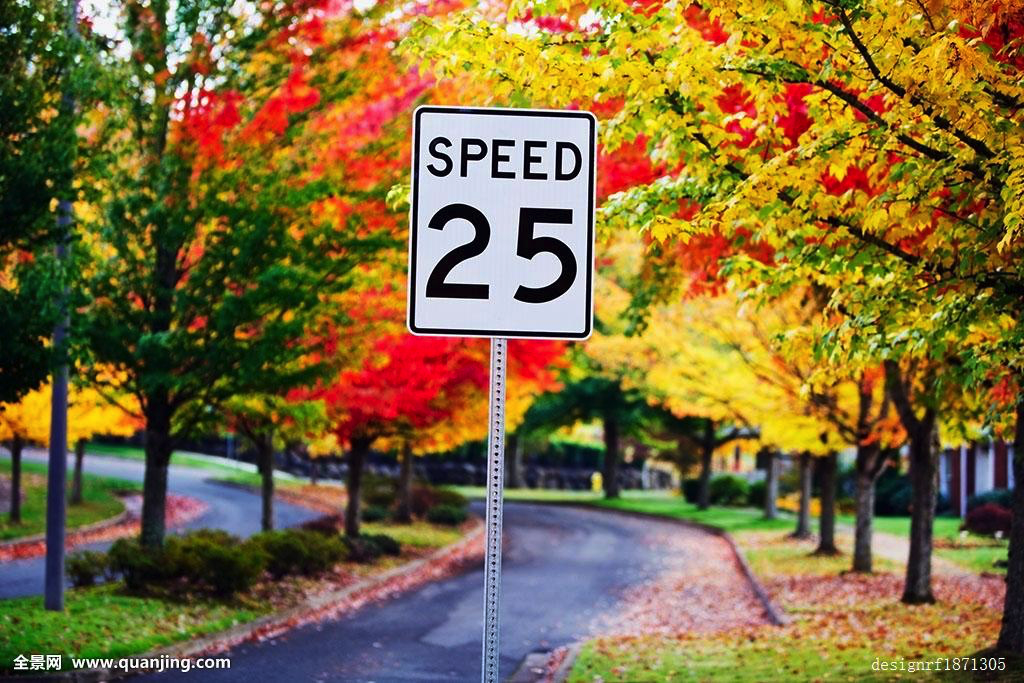

#### Change the original image to hsv channel, here I use the function in opencv.   
whitehsv-picture.jpg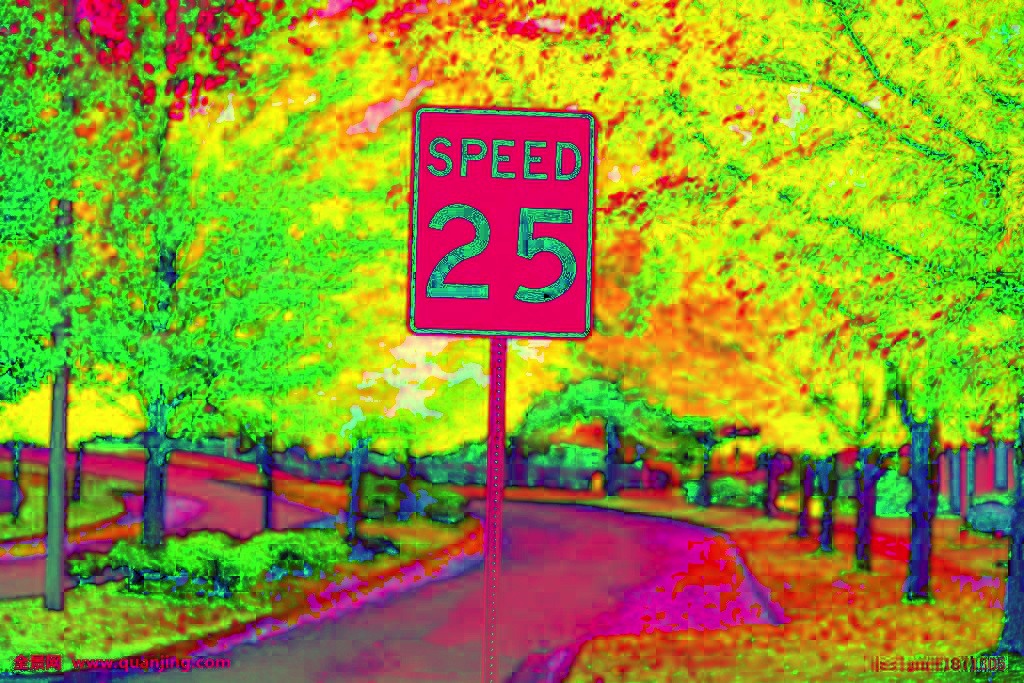

#### With the input color, lower and upper list, extract the color area in the image.   
whiteclolorarea-picture.jpg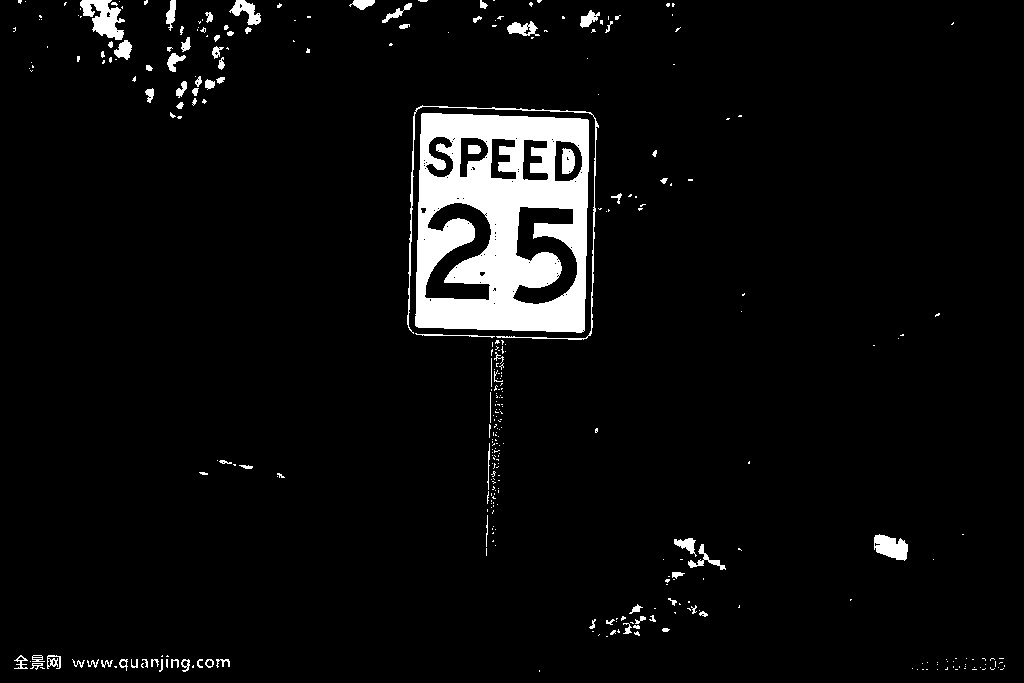

The color area in the clolorarea-picture is white. Other colors was filtered and became black. Because there are still some other color which are colose to white. These colors may disturb finding sign. So we need to optimize more. 

#### Optimize process

#### 1. Blurring  
First, we need to blur the whiteclolorarea image, that will make interference region blurred.  
whiteblurred-picture.jpg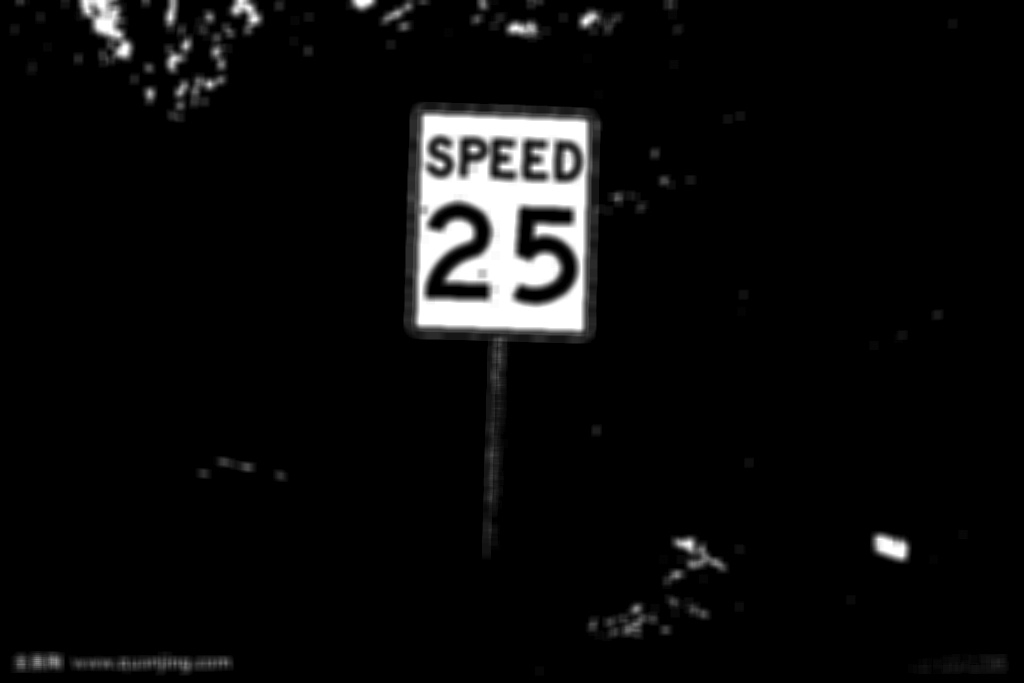

Most interference region blurred. 

#### 2. Binarization
After binarization, the extracted area will more clear.  
whitebinary-picture.jpg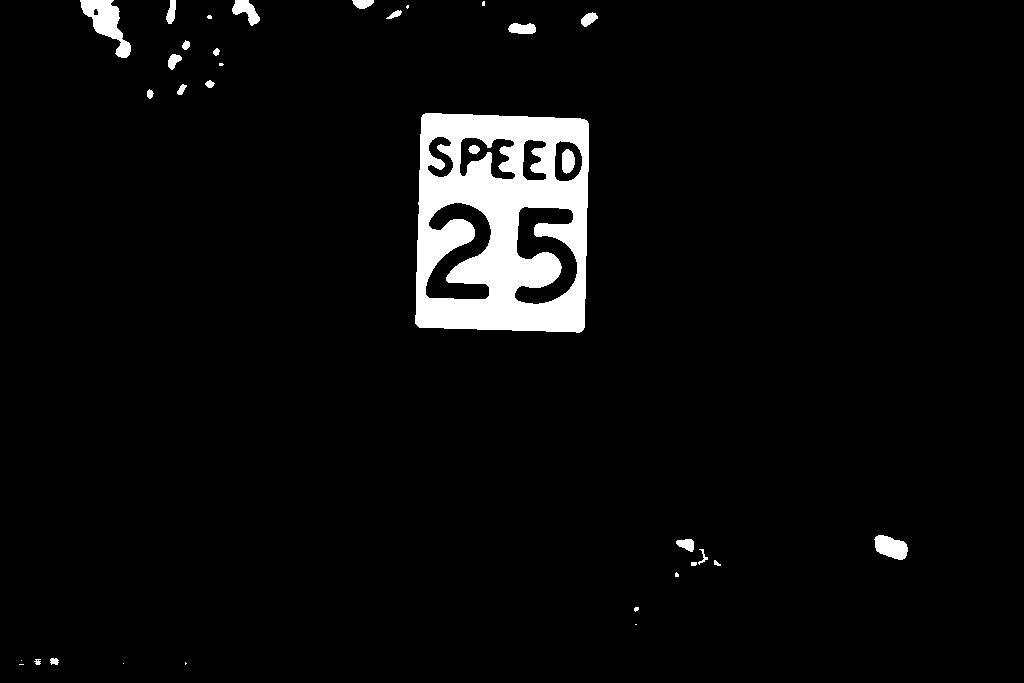

#### 3. Close operation  
The process of swelling after the first expansion is called a close operation. Close operation can fill small voids in the object to smooth borders.  
whiteclosed-picture.jpg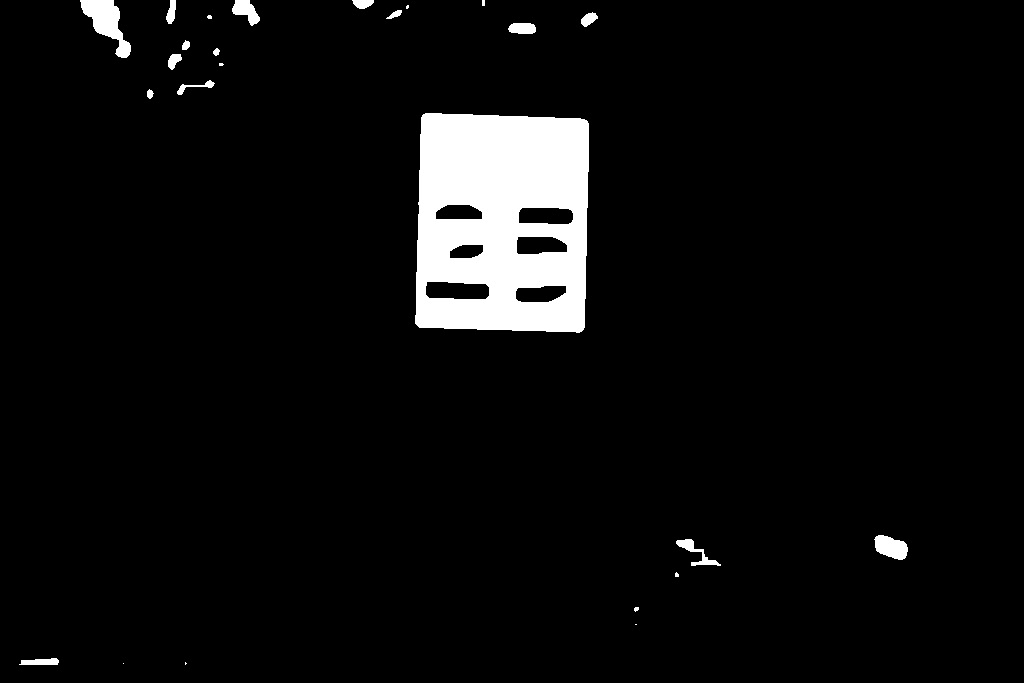  

#### 4. Contine to remove the interference.    
Corrosion will erode white pixels in the image to eliminate small spots. And the expansion operation will cause the remaining white pixels to expand and grow back again.

#### FInd the contours 
After process, we need to extract the color area. First, we need to find the contours of the area. Print the number of contours. The numbers means how many 'sign' we find.

In [6]:
def FindSign(img,color,lower,upper):
    # read original picture 
    cv2.imwrite(color+'original-picture.jpg',img)
    # transfor to hsv channel
    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    cv2.imwrite(color+'hsv-picture.jpg',hsv)
    #exract the color area 
    clolorarea=cv2.inRange(hsv,lower,upper)
    cv2.imwrite(color+'clolorarea-picture.jpg',clolorarea)
    #in order to remove interferences 
    #blurr
    blurred=cv2.blur(clolorarea,(9,9))
    cv2.imwrite(color+'blurred-picture.jpg',blurred)
    #binarization
    threshold_value,binary=cv2.threshold(blurred,127,255,cv2.THRESH_BINARY)
    cv2.imwrite(color+'binary-picture.jpg',binary)
    #close operation 
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    cv2.imwrite(color+'closed-picture.jpg',closed)
    #corrosion and swelling
    erode=cv2.erode(closed,None,iterations=4)
    dilate=cv2.dilate(erode,None,iterations=4)
    # find the Contours
    image,numbers,hierarchy=cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    print('number of targets：',len(numbers)) 
    i = 0
    for con in numbers:
        #transfer contour to rectangle
        rect=cv2.minAreaRect(con)
        #four corners of rectangle 
        corners=np.int0(cv2.boxPoints(rect))
        #calculate height and width of rectangle
        #corners includes four points, 
        #they are left bottom, left top, right bottom and right top points
        h1=max(corners[0][1],corners[1][1],corners[2][1],corners[3][1])
        h2=min(corners[0][1],corners[1][1],corners[2][1],corners[3][1])
        w1=max(corners[0][0],corners[1][0],corners[2][0],corners[3][0])
        w2=min(corners[0][0],corners[1][0],corners[2][0],corners[3][0])
        #to make sure the extracted area is correct 
        if h1-h2>0 and w1-w2>0:
            #cut the color area
            temp=img[h2:h1,w2:w1]
            i=i+1
            temp1 = cv2.resize(temp,(32,32))
            cv2.imwrite(color+str(i)+'.jpg',temp1) 

In [7]:
#white
img1=cv2.imread('6.jpg')
FindSign(img1,color[0],lower[0],upper[0])

number of targets： 7


The result shows, there are 7 white traffic signs, really?  
I check all the results, there only 1 is correct.  
white2.jpg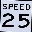

The result is good. Although there are somr wrong result, but the function still get the correct traffic sign. 

In [8]:
#red
img1=cv2.imread('7.jpg')
FindSign(img1,color[1],lower[1],upper[1])

number of targets： 1


red1.jpg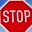

In [9]:
#blue
img1=cv2.imread('0.png')
FindSign(img1,color[2],lower[2],upper[2])

number of targets： 1


blue1.jpg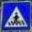

What if there are many traffic sign in one image?

In [10]:
#multi-blue
img1=cv2.imread('1.jpg')
FindSign(img1,color[2],lower[2],upper[2])

number of targets： 6


blueoriginal-picture.jpg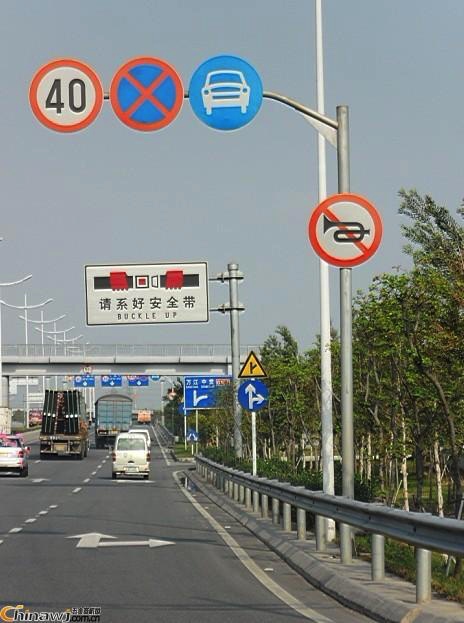

blue1.jpg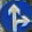

blue2.jpg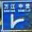

blue5.jpg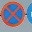

blue6.jpg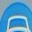

The clearer blue traffic signs are extracted. But some small traffic signs, such as the signs under the brige. And the blue car traffic sign is partly extracted. May be in this image, the blue car traffic sign is too big and let the function think the white parts in the sign are borders.

## Part 2: Using neuron network to classify traffic sign

In this part, I will use the method in assignment 3. Using keras to build a neuron network to classify the traffic signs.  
In this part, I download a dataset from internet. The dataset includes 43 classifications traffic signs. There is a csv file to record the classifications by using 0-42 numbers. Each number relates to a label, the label is the name of the traffic sign.  
The size of traffic sign image in this dataset is 32x32, and they are rgb images, so the channel is 3. 

After building the neuron network, I will use three traffic signs to test the network. The final output is the classification(name) of the test sign. 

The steps in this part:
1. Load the csv file, show the classificaion of traffic signs.
2. Load the data, and get the training data and test data. 
3. Randomly scrambles the dataset.
4. Set the parameters of neuron network.
5. Build the neuron network.
6. Train the network.
7. Save and load the model's data and weight.
8. Resize the test image 
9. Test the neuron network and see the result of classifying.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.ops import control_flow_ops
control_flow_ops = tf
%matplotlib inline
import csv

import warnings
warnings.filterwarnings("ignore")

### Read the csv file, show the 43 classification 

In [12]:
label = {}
with open('signnames.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        num, sign = row
        label[num] = sign
        print(num)
        print(sign)

ClassId
SignName
0
Speed limit (20km/h)
1
Speed limit (30km/h)
2
Speed limit (50km/h)
3
Speed limit (60km/h)
4
Speed limit (70km/h)
5
Speed limit (80km/h)
6
End of speed limit (80km/h)
7
Speed limit (100km/h)
8
Speed limit (120km/h)
9
No passing
10
No passing for vechiles over 3.5 metric tons
11
Right-of-way at the next intersection
12
Priority road
13
Yield
14
Stop
15
No vechiles
16
Vechiles over 3.5 metric tons prohibited
17
No entry
18
General caution
19
Dangerous curve to the left
20
Dangerous curve to the right
21
Double curve
22
Bumpy road
23
Slippery road
24
Road narrows on the right
25
Road work
26
Traffic signals
27
Pedestrians
28
Children crossing
29
Bicycles crossing
30
Beware of ice/snow
31
Wild animals crossing
32
End of all speed and passing limits
33
Turn right ahead
34
Turn left ahead
35
Ahead only
36
Go straight or right
37
Go straight or left
38
Keep right
39
Keep left
40
Roundabout mandatory
41
End of no passing
42
End of no passing by vechiles over 3.5 metric tons


Here are the number of all 43 kinds traffic signs and their name.

### Load the data

In [13]:
# dataset includes feature and label
# label is a number of 0-42, relates to the 43 classification
import pickle
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape, X_test.shape)

(39209, 32, 32, 3) (12630, 32, 32, 3)


In the dataset, the number of training data is 39209, the number of training data is 12630. 

In [14]:
# Randomly scrambles the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

### Build neuron network

In [15]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


### Set the parameters of neuron network

In [16]:
batch_size = 32
nb_classes = 43
nb_epoch = 20

# input image dimensions
img_rows, img_cols = 32, 32
# rgb image has three channels 
img_channels = 3
# convert labels to one-hot vectors
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

### The model:  
The idea of model is coming from VGG model. Because VGG model perfromance well in image detection, this structure can preserve the images' details. In my project, I need the feature to classify the traffic sign, so VGG model is good. But in my assignment, I use whole VGG model, it generated overfitting, so I use a simply model this time. 

In [17]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="tf"))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="tf"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

### Train the network
I use a setting from internet. 

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))

Epoch 1/20
1225/1225 [==============================] - 160s 131ms/step - loss: 2.3372 - acc: 0.3361 - val_loss: 0.8925 - val_acc: 0.7430
Epoch 2/20
1225/1225 [==============================] - 160s 131ms/step - loss: 0.8552 - acc: 0.7311 - val_loss: 0.2597 - val_acc: 0.9285
Epoch 3/20
1225/1225 [==============================] - 160s 130ms/step - loss: 0.4246 - acc: 0.8674 - val_loss: 0.1554 - val_acc: 0.9542
Epoch 4/20
1225/1225 [==============================] - 166s 135ms/step - loss: 0.2788 - acc: 0.9129 - val_loss: 0.1253 - val_acc: 0.9701
Epoch 5/20
1225/1225 [==============================] - 149s 122ms/step - loss: 0.2066 - acc: 0.9381 - val_loss: 0.1059 - val_acc: 0.9754
Epoch 6/20
1225/1225 [==============================] - 152s 124ms/step - loss: 0.1686 - acc: 0.9504 - val_loss: 0.1088 - val_acc: 0.9699
Epoch 7/20
1225/1225 [==============================] - 153s 125ms/step - loss: 0.1420 - acc: 0.9583 - val_loss: 0.1156 - val_acc: 0.9717
Epoch 8/20
1225/1225 [============

The accuracy is very good. 

### Save and load model's data and weight

In [19]:
# save model's data and weight
model.save_weights('model.h5', overwrite=True)
with open('model.json', 'w') as f:
    f.write(model.to_json())

In [20]:
# load model's data and weight
import cv2
from keras.models import model_from_json
with open('model.json', 'r') as f:
    model = model_from_json(f.read())
    
model.load_weights('model.h5')

### Resize the test image

In [21]:
def resize(img):
    fx = float(img_rows) / img.shape[0]
    fy = float(img_rows) / img.shape[1]
    fx = fy = min(fx, fy)
    img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
    outimg = np.zeros((img_rows, img_rows, img_channels), dtype=np.float32)
    w = img.shape[1]
    h = img.shape[0]
    x = (img_rows - w) / 2
    y = (img_rows - h) / 2
    x = int(x)
    y = int(y)
    outimg[y:y+h, x:x+w, :] = img
    return outimg

### Test the neuron network and see the result of classifying.

#### Here I use a three pictures download from the internet. 

14
3
17


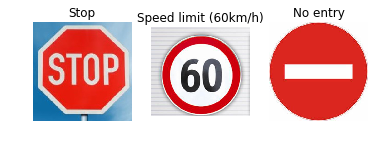

In [22]:
plt.figure()
for index, filename in enumerate(['test.jpg','test2.jpg','test3.jpg']):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32')
    img /= 255
    x = resize(img)
    # 根据模型进行分类
    result = model.predict_classes([x.reshape((1, img_rows, img_rows, img_channels))], verbose=0)[0]
    print(result)
    plt.subplot(1, 3, index+1)
    plt.imshow(img)
    plt.title(label[str(result)])
    plt.axis('off')

We can see that, the classifying is great. 

#### NOW, using the result of part 1.

14


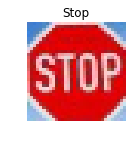

In [23]:
plt.figure()
for index, filename in enumerate(['red1.jpg']):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32')
    img /= 255
    x = resize(img)
    # 根据模型进行分类
    result = model.predict_classes([x.reshape((1, img_rows, img_rows, img_channels))], verbose=0)[0]
    print(result)
    plt.subplot(1, 3, index+1)
    plt.imshow(img)
    plt.title(label[str(result)])
    plt.axis('off')

Result is also good. 